# Homework: Multiple Hypothesis Testing
Author: Geunhan Kim  
Due: 2025-07-18


## Problem 1: 3-ary Hypothesis Testing (Discrete)

Consider a three-hypothesis classification problem with a discrete observation $Y \in \{a, b, c\}$. The class-conditional probability mass functions under each hypothesis are:

$$
\begin{aligned}
H_0 &: \quad P(Y = a) = 0.6,\quad P(Y = b) = 0.3,\quad P(Y = c) = 0.1 \\
H_1 &: \quad P(Y = a) = 0.2,\quad P(Y = b) = 0.5,\quad P(Y = c) = 0.3 \\
H_2 &: \quad P(Y = a) = 0.1,\quad P(Y = b) = 0.4,\quad P(Y = c) = 0.5
\end{aligned}
$$

Assume uniform priors:
$$
\pi_0 = \pi_1 = \pi_2 = \frac{1}{3}
$$

The cost matrix is:
$$
C = \begin{bmatrix}
0 & 1 & 2 \\
1 & 0 & 1 \\
2 & 1 & 0 \\
\end{bmatrix}
$$

---

**(a)** For each value $y \in \{a, b, c\}$, compute the Bayes risk for decisions $i = 0, 1, 2$.  

**(b)** For each value $y$, determine the Bayes-optimal decision $\delta_B(y)$ that minimizes the Bayes risk.

**(c)** Compute the total Bayes risk $r(\delta_B)$.

**(d)** Now assume the prior is unknown. Derive the minimax decision rule $\delta_m(y)$ that minimizes the maximum conditional risk for each $y$. Also compute the corresponding worst-case risk $r(\delta_m)$.

In [10]:
# (a)
import numpy as np

observ = ['a', 'b', 'c']
P = np.array([[0.6, 0.3, 0.1], [0.2, 0.5, 0.3], [0.1, 0.4, 0.5]])
prior = np.array([1/3, 1/3, 1/3])
cost = np.array([[0, 1, 2], [1, 0, 1], [2, 1, 0]])

risk = np.zeros((3, 3))

    
for idx, obs in enumerate(observ):
    for i in range(3): 
        i_risk = 0
        for j in range(3):
            i_risk += cost[i, j] * prior[j] * P[j, idx] 

        risk[idx, i] = i_risk

print("각 관측값 y 별 decision i=0,1,2의 risk(Row : y, Column : i):")
print(risk)


각 관측값 y 별 decision i=0,1,2의 risk(Row : y, Column : i):
[[0.13333333 0.23333333 0.46666667]
 [0.43333333 0.23333333 0.36666667]
 [0.43333333 0.2        0.16666667]]


In [11]:
# (b)
min_risk_idx = np.argmin(risk, axis = 1)
optimal_decision = {'a' : int(min_risk_idx[0]), 'b' : int(min_risk_idx[1]), 'c' : int(min_risk_idx[2])}
print("Optimal decision :", optimal_decision)

Optimal decision : {'a': 0, 'b': 1, 'c': 2}


In [12]:
# (c)
conditional_risk = np.zeros((3, 3))

total_bayes_risk = 0
for j in range(3):           
    for y_idx in range(3):    
        i = min_risk_idx[y_idx]   
        total_bayes_risk += prior[j] * P[j, y_idx] * cost[i, j]

print("Total Bayes risk:", total_bayes_risk)

Total Bayes risk: 0.5333333333333333


In [13]:
# (d)
max_risks = np.zeros((3, 3))

for y in range(3):
    for i in range(3):
        risks_for_i = []
        for j in range(3):
            risk = cost[i, j] * P[j, y]
            risks_for_i.append(risk)

        max_risk_j = max(risks_for_i)
        max_risks[i][y] = max_risk_j    

minimax_idx = np.argmin(max_risks, axis = 0)

minimax_decision = {'a' : int(minimax_idx[0]), 'b' : int(minimax_idx[1]), 'c' : int(minimax_idx[2])}
print('minimax_decision :', minimax_decision)

minimax = np.min(max_risks, axis = 0)
worst_case_risk = max(minimax)
print('worst case risk :', worst_case_risk)


minimax_decision : {'a': 0, 'b': 1, 'c': 2}
worst case risk : 0.4


## Problem 2: 3-ary Hypothesis Testing (Continuous)

Consider a classification problem where the observation $Y \in \mathbb{R}$ follows a Gaussian distribution under each hypothesis:

$$
\begin{aligned}
H_0 &: Y \sim \mathcal{N}(-2, 1) \\
H_1 &: Y \sim \mathcal{N}(0, 1) \\
H_2 &: Y \sim \mathcal{N}(2, 1)
\end{aligned}
$$

Assume uniform prior:
$$
\pi_0 = \pi_1 = \pi_2 = \frac{1}{3}
$$

And zero-one loss:
$$
C(i, j) = \mathbf{1}\{i \neq j\}
$$

---

**(a)** Plot the three class-conditional densities over the interval $y \in [-6, 6]$.

**(b)** Implement the Bayes decision rule $\delta_B(y)$ that minimizes the expected risk under 0-1 loss and uniform prior.  
(Hint: Choose the hypothesis with maximum class-conditional likelihood.)

**(c)** Plot the decision regions on the real line. Mark the boundaries clearly.

**(d)** Estimate the Bayes risk numerically.

**(e)** Now assume the prior is unknown. Derive a minimax decision rule $\delta_m(y)$ that minimizes the maximum conditional error, and compute the corresponding worst-case risk $r(\delta_m)$.

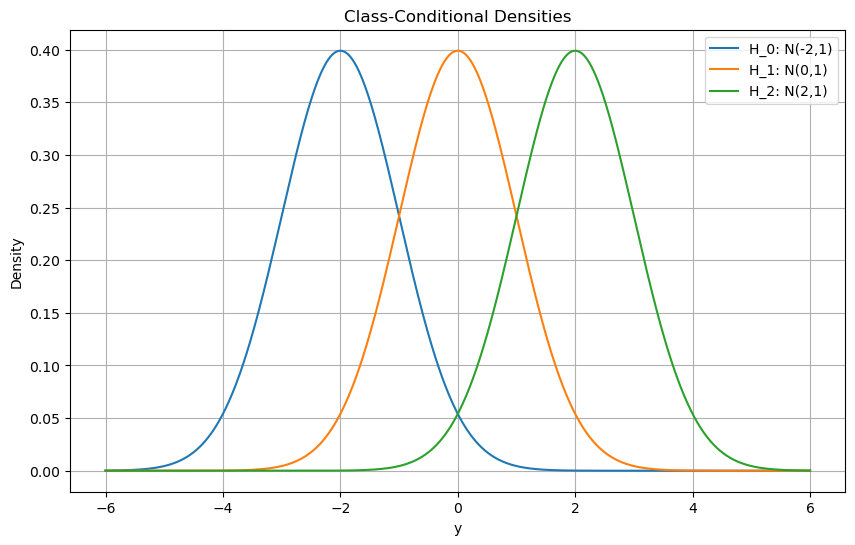

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

means = [-2, 0, 2]

prior = [1/3, 1/3, 1/3]

y = np.linspace(-6, 6, 1000)

# (a)
pdfs = [norm.pdf(y, loc = mean, scale = 1) for mean in means]

plt.figure(figsize=(10,6))
plt.plot(y, pdfs[0], label='H_0: N(-2,1)')
plt.plot(y, pdfs[1], label='H_1: N(0,1)')
plt.plot(y, pdfs[2], label='H_2: N(2,1)')
plt.xlabel('y')
plt.ylabel('Density')
plt.title('Class-Conditional Densities')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
# 0-1 loss이고 uniform cost이므로 Maximum A Posteriori

# (b)
pdfs_array = np.array(pdfs)

decision = np.argmax(pdfs_array, axis=0)

for i in range(0, 1000, 50):
    print(f"y = {y[i]:.2f}: decision = {decision[i]}")

boundaries = []
for i in range(1, len(decision)):
    if decision[i] != decision[i-1]:
        boundary = y[i]
        boundaries.append(round(float(boundary), 1))

print("decision boundaries:", boundaries)

y = -6.00: decision = 0
y = -5.40: decision = 0
y = -4.80: decision = 0
y = -4.20: decision = 0
y = -3.60: decision = 0
y = -3.00: decision = 0
y = -2.40: decision = 0
y = -1.80: decision = 0
y = -1.20: decision = 0
y = -0.59: decision = 1
y = 0.01: decision = 1
y = 0.61: decision = 1
y = 1.21: decision = 2
y = 1.81: decision = 2
y = 2.41: decision = 2
y = 3.01: decision = 2
y = 3.61: decision = 2
y = 4.21: decision = 2
y = 4.81: decision = 2
y = 5.41: decision = 2
decision boundaries: [-1.0, 1.0]


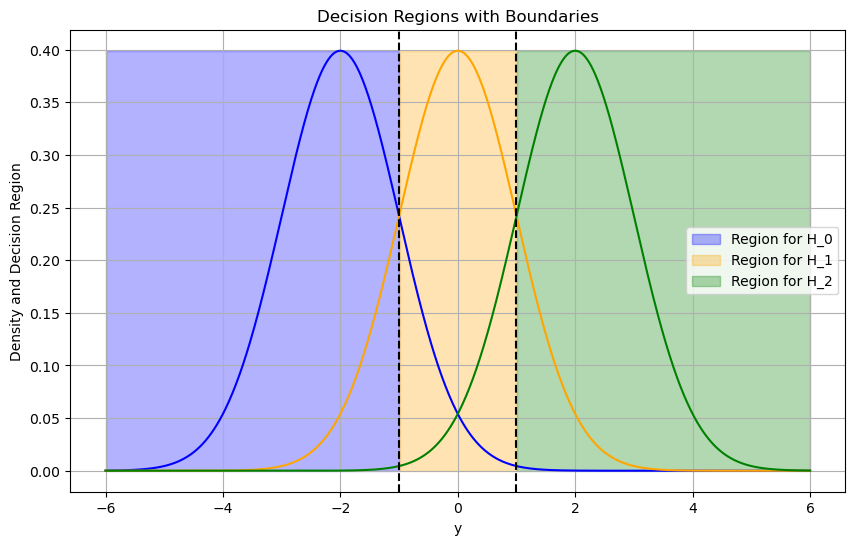

In [16]:
# (c)
plt.figure(figsize=(10,6))
colors = ['blue', 'orange', 'green']
H = ['H_0', 'H_1', 'H_2']

for j in range(3):
    region = (decision == j)
    plt.fill_between(y, 0, np.max(pdfs_array), where=region, color=colors[j], alpha=0.3, label=f'Region for {H[j]}')
    plt.plot(y, pdfs[j], color=colors[j])

plt.axvline(-1, color='k', linestyle='--')
plt.axvline(1, color='k', linestyle='--')

plt.xlabel('y')
plt.ylabel('Density and Decision Region')
plt.title('Decision Regions with Boundaries')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# (d)
P_H0 = norm.cdf(-1, loc = means[0], scale = 1)
P_H1 = norm.cdf(1, loc = means[1], scale = 1) - norm.cdf(-1, loc = means[1], scale = 1)
P_H2 = 1 - norm.cdf(1, loc = means[2], scale = 1)

P_H = [P_H0, P_H1, P_H2]
bayes_risk = 0

for i in range(3):
    bayes_risk += prior[i] * P_H[i]

bayes_risk = 1 - bayes_risk

print("Bayes risk:", bayes_risk)


Bayes risk: 0.2115403385752761


In [18]:
# (e)

y = np.linspace(-6, 6, 1000)

likelihoods = np.array([norm.pdf(y, loc=mean, scale=1) for mean in means])
max_risks_c = np.zeros((3, len(y)))

for y_idx in range(len(y)):
    for i in range(3):
        risks_for_i = []
        for j in range(3):
            cost = (1 if i != j else 0)
            risk = cost * likelihoods[j, y_idx]
            risks_for_i.append(risk)

        max_risk_j = max(risks_for_i)
        max_risks_c[i][y_idx] = max_risk_j    
        
print(max_risks_c)

minimax_idx_c = np.argmin(max_risks_c, axis = 0)

for i in range(0, 1000, 50):
    print(f"y = {y[i]:.2f}: minimax_decision = {minimax_idx_c[i]}")

m_boundaries = []
for i in range(1, len(minimax_idx_c)):
    if minimax_idx_c[i] != minimax_idx_c[i-1]:
        boundary = y[i]
        m_boundaries.append(round(float(boundary), 1))

print("decision boundaries(minimax):", m_boundaries)

minimax_c = np.min(max_risks_c, axis = 0)
worst_case_risk_c = max(np.min(max_risks_c, axis = 0))
print('worst case risk :', worst_case_risk_c)



[[6.07588285e-09 6.52947950e-09 7.01592715e-09 ... 1.47286482e-04
  1.40407362e-04 1.33830226e-04]
 [1.33830226e-04 1.40407362e-04 1.47286482e-04 ... 1.47286482e-04
  1.40407362e-04 1.33830226e-04]
 [1.33830226e-04 1.40407362e-04 1.47286482e-04 ... 7.01592715e-09
  6.52947950e-09 6.07588285e-09]]
y = -6.00: minimax_decision = 0
y = -5.40: minimax_decision = 0
y = -4.80: minimax_decision = 0
y = -4.20: minimax_decision = 0
y = -3.60: minimax_decision = 0
y = -3.00: minimax_decision = 0
y = -2.40: minimax_decision = 0
y = -1.80: minimax_decision = 0
y = -1.20: minimax_decision = 0
y = -0.59: minimax_decision = 1
y = 0.01: minimax_decision = 1
y = 0.61: minimax_decision = 1
y = 1.21: minimax_decision = 2
y = 1.81: minimax_decision = 2
y = 2.41: minimax_decision = 2
y = 3.01: minimax_decision = 2
y = 3.61: minimax_decision = 2
y = 4.21: minimax_decision = 2
y = 4.81: minimax_decision = 2
y = 5.41: minimax_decision = 2
decision boundaries(minimax): [-1.0, 1.0]
worst case risk : 0.2412440878